## Importing libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format 
import re
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('loan.csv')


###  Data cleaning 


In [110]:
print(df.shape)
print(df.info())
print(df.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [111]:
print('Number of empty Rows:')
print(df.isnull().all(axis=1).sum())
df.head()

Number of empty Rows:
0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [112]:
print('Number of empty Columns:')
print(df.isnull().all(axis=0).sum())

Number of empty Columns:
54


In [113]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [114]:
df.drop(df.iloc[:, 53:105], inplace = True, axis = 1) 


In [115]:
columns_drop_list1 = ["pymnt_plan","delinq_2yrs","pub_rec", "application_type", "initial_list_status"]
df.drop(labels = columns_drop_list1 , axis =1, inplace=True)
# Dropped columns - "pymnt_plan","delinq_2yrs","pub_rec", "application_type", "initial_list_status"


In [116]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,May-16,0.00,NaN,1,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,Sep-13,0.00,NaN,1,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,May-16,0.00,NaN,1,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,Apr-16,0.00,NaN,1,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,May-16,0.00,NaN,1,0.00,0.00,NaN,NaN,NaN,NaN


In [117]:

df.drop(labels = "policy_code", axis = 1, inplace = True)
# Dropped columns - "policy_code"

In [118]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [119]:
col_to_del = ["tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit"]
df.drop(labels = col_to_del, axis = 1, inplace = True)
df.head()
#Columns deleted - "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit"


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,NaN,0.00,0.00


In [120]:
col_to_del = ["collections_12_mths_ex_med", "mths_since_last_major_derog", "tax_liens"]
df.drop(labels = col_to_del, axis = 1, inplace = True)
df.head()
# Dropped Columns - "collections_12_mths_ex_med", "mths_since_last_major_derog", "tax_liens"


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00


In [51]:
df.shape


(39717, 98)

In [52]:
df.emp_length.fillna('0', inplace = True)
df['emp_length'] = df.emp_length.str.extract('(\d+)')
df.head()
# Replacing NA values with 0

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [53]:
print("Before cleaning:")
print(df.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(df.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [54]:
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')
#converting interest rate and revolving line Utilization Rate

In [55]:
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
df[cols1] =df[cols1].apply(pd.to_numeric)
#converting 'loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt' into numeric data type

In [56]:
(df.loan_status.value_counts()*100)/len(df)
# Different categories of loan Status

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [57]:
(df.purpose.value_counts()*100)/len(df)
# Different categories of Purposes for loan

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

In [58]:
(df.purpose.value_counts()*100)/len(df)

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

In [59]:
df.issue_d = pd.to_datetime(df.issue_d, format = '%b-%y')
df['year'] = df['issue_d'].dt.year
df['month'] = df['issue_d']. dt.month
df.head()
## Converting Date into Years and Months

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,year,month
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12


In [60]:
df['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

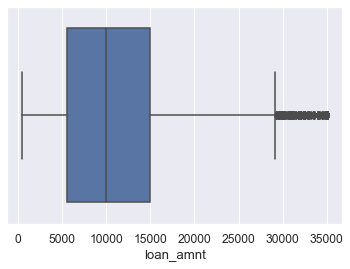

In [61]:
sns.boxplot(df.loan_amnt)

In [62]:
df.total_pymnt.describe()

count   39717.00
mean    12153.60
std      9042.04
min         0.00
25%      5576.93
50%      9899.64
75%     16534.43
max     58563.68
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

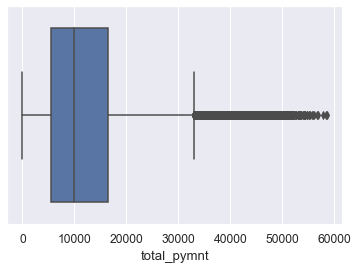

In [63]:
sns.boxplot(df.total_pymnt)

In [64]:
print("Before removal of outliers:\n")
print(df['annual_inc'].describe())

Before removal of outliers:

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64


In [65]:
df = df[df['annual_inc']< df['annual_inc'].quantile(0.99)]
print('After removal of Outliers :\n')
print(df['annual_inc'].describe())

After removal of Outliers :

count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

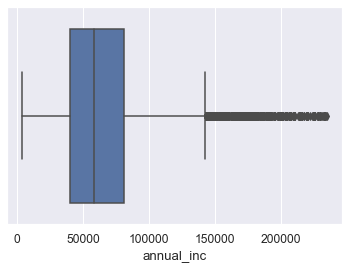

In [66]:
sns.boxplot(df.annual_inc)

In [67]:
df['int_rate'].describe()

count   39319.00
mean       12.01
std         3.72
min         5.42
25%         9.25
50%        11.83
75%        14.54
max        24.59
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

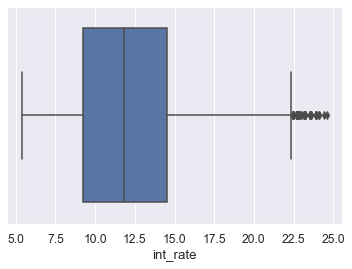

In [68]:
sns.boxplot(df.int_rate)

In [69]:
col_to_drop = ['total_rec_int', 'member_id', 'revol_bal']
df.drop(labels = col_to_drop, axis = 1, inplace = True)
df.head()
## Dropping columns 'total_rec_int', 'member_id', 'revol_bal' from dataframe

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12


In [71]:
col_drop_list4 = ['installment']
df.drop(labels = col_drop_list4, axis = 1, inplace = True)
df.head()
# Dropping columns'installment' from the dataframe

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,...,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27,C,C4,Ryder,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96,C,C5,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49,C,C1,AIR RESOURCES BOARD,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
4,1075358,3000,3000,3000.00,60 months,12.69,B,B5,University Medical Group,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12


In [72]:
col_drop_list4 = ['next_pymnt_d']
df.drop(labels = col_drop_list4, axis = 1, inplace = True)
df.head()
## Dropping column 'next_pymnt_d' from dataframe

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,...,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27,C,C4,Ryder,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96,C,C5,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49,C,C1,AIR RESOURCES BOARD,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12
4,1075358,3000,3000,3000.00,60 months,12.69,B,B5,University Medical Group,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2011,12


### Univariate Analysis

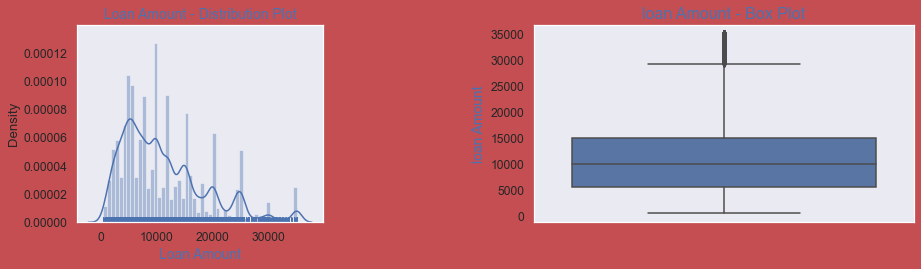

In [242]:
plt.figure(figsize=(15,8), facecolor = 'r')
sns.set_style('dark')
plt.subplot(2,3,1)
ax = sns.distplot(df['loan_amnt'], rug = True)
ax.set_title('Loan Amount - Distribution Plot', fontsize = 14, color = 'b')
ax.set_xlabel('Loan Amount', fontsize = 14, color = 'b')
plt.subplot(2,2,2)
ax = sns.boxplot(y=df['loan_amnt'])
ax.set_title('loan Amount - Box Plot', fontsize = 16, color = 'b')
ax.set_ylabel('loan Amount', fontsize = 14, color = 'b')
plt.show()


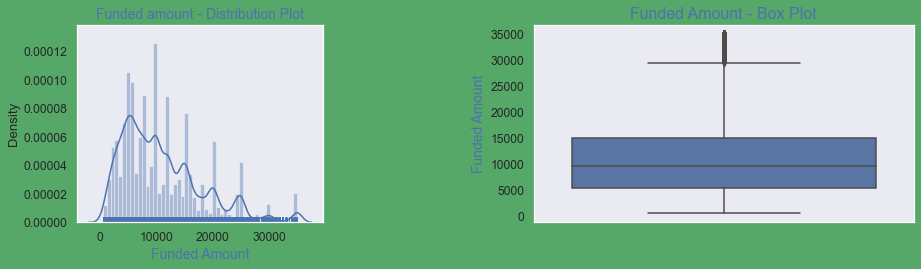

In [255]:
plt.figure(figsize=(15,8), facecolor = 'g')
sns.set_style('dark')
plt.subplot(2,3,1)
ax = sns.distplot(df['funded_amnt'], rug = True)
ax.set_title('Funded amount - Distribution Plot', fontsize = 14, color = 'b')
ax.set_xlabel('Funded Amount', fontsize = 14, color = 'b')
plt.subplot(2,2,2)
ax = sns.boxplot(y=df['funded_amnt'])
ax.set_title('Funded Amount - Box Plot', fontsize = 16, color = 'b')
ax.set_ylabel('Funded Amount', fontsize = 14, color = 'b')
plt.show()

Text(0.5, 0, 'Funded Amount')

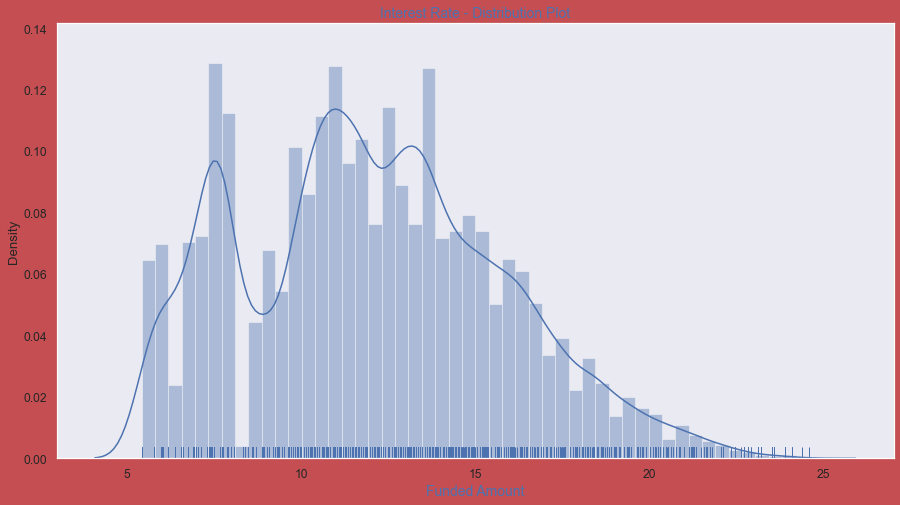

In [253]:
df['int_rate'] = df['int_rate'].str.rstrip('%')
plt.figure(figsize=(15,8), facecolor = 'r')
sns.set_style('dark')
#plt.subplot(2,3,1)
ax = sns.distplot(df['int_rate'], rug = True)
ax.set_title('Interest Rate - Distribution Plot', fontsize = 14, color = 'b')
ax.set_xlabel('Funded Amount', fontsize = 14, color = 'b')
#df['int_rate'] = df['int_rate'].astype(int)
#plt.subplot(2,2,2)
#ax = sns.boxplot(y=df['int_rate'])
#ax.set_title('Interest Rate - Box Plot', fontsize = 16, color = 'b')
#ax.set_ylabel('Interest Rate', fontsize = 14, color = 'b')
#plt.show()

In [73]:
df[pd.to_numeric(df['annual_inc'], errors = 'coerce').notnull()]
df1 = df[['annual_inc']]
df1.head()

,annual_inc
0,24000.00
1,30000.00
2,12252.00
3,49200.00
4,80000.00


Text(0.5, 0, 'Annual income')

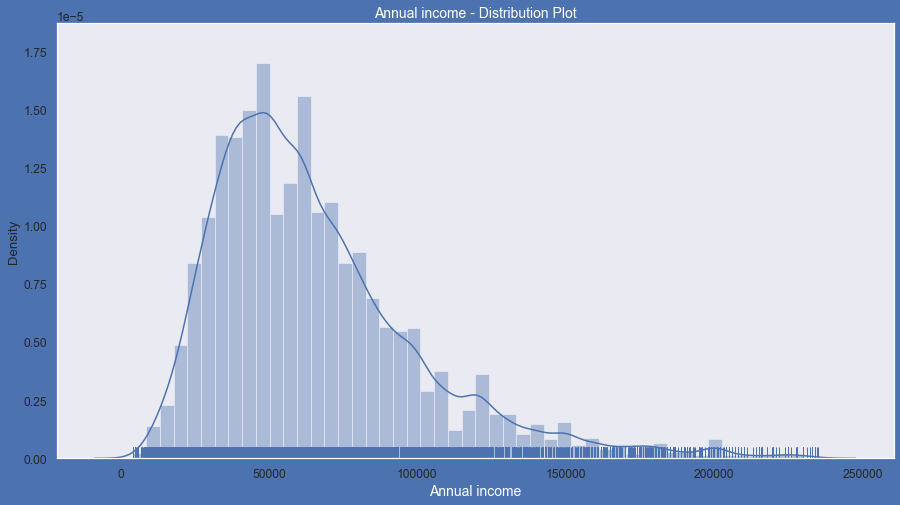

In [74]:
plt.figure(figsize=(15,8), facecolor = 'b')
sns.set_style('dark')
#plt.subplot(2,2,1)
ax = sns.distplot(df['annual_inc'], rug = True)
ax.set_title('Annual income - Distribution Plot', fontsize = 14, color = 'w')
ax.set_xlabel('Annual income', fontsize = 14, color = 'w')
#plt.subplot(2,2,2)


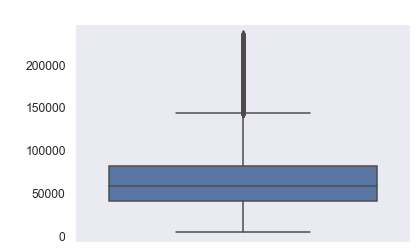

In [75]:
ax = sns.boxplot(y=df['annual_inc'])
ax.set_title('Annual income - Box Plot', fontsize = 16, color = 'w')
ax.set_ylabel('Annual income', fontsize = 14, color = 'w')
plt.show()

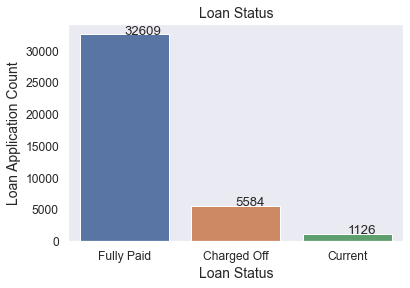

In [76]:
ax = sns.countplot(x = df['loan_status'])
ax.set_title('Loan Status', fontsize = 14)
ax.set_xlabel('Loan Status', fontsize = 14)
ax.set_ylabel('Loan Application Count', fontsize = 14)
s = df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3, v.loan_status)


Text(0.5, 0, 'Number of applicants')

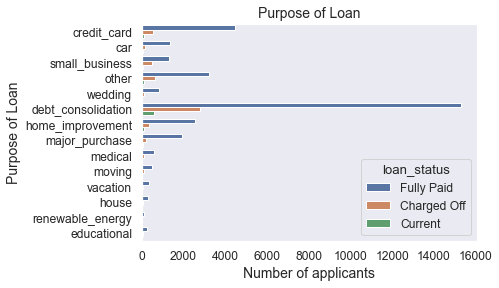

In [268]:
ax = sns.countplot(y = df['purpose'], hue = df['loan_status'])
ax.set_title('Purpose of Loan', fontsize = 14)
ax.set_ylabel('Purpose of Loan', fontsize = 14)
ax.set_xlabel('Number of applicants', fontsize = 14)

Text(0, 0.5, 'Number of applicants')

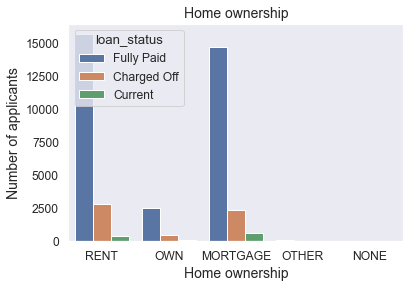

In [269]:
ax = sns.countplot(x = df['home_ownership'], hue = df['loan_status'])
ax.set_title('Home ownership', fontsize = 14)
ax.set_xlabel('Home ownership', fontsize = 14)
ax.set_ylabel('Number of applicants', fontsize = 14)

Text(0, 0.5, 'Number of applicants')

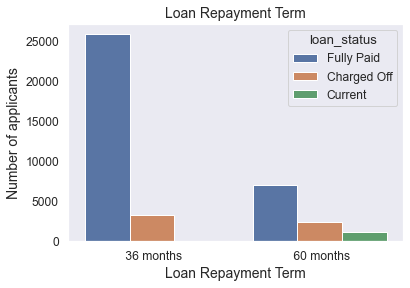

In [271]:
ax = sns.countplot(x = df['term'], hue = df['loan_status'])
ax.set_title('Loan Repayment Term', fontsize = 14)
ax.set_xlabel('Loan Repayment Term', fontsize = 14)
ax.set_ylabel('Number of applicants', fontsize = 14)

In [309]:
df.issue_d = pd.to_datetime(df.issue_d, format = '%b-%y')
df['year'] = df['issue_d'].dt.year
df['month'] = df['issue_d']. dt.month
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,year,month
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,...,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,2011,12
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,...,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,2011,12
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,...,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,2011,12
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,...,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,2011,12
4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,...,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,2011,12


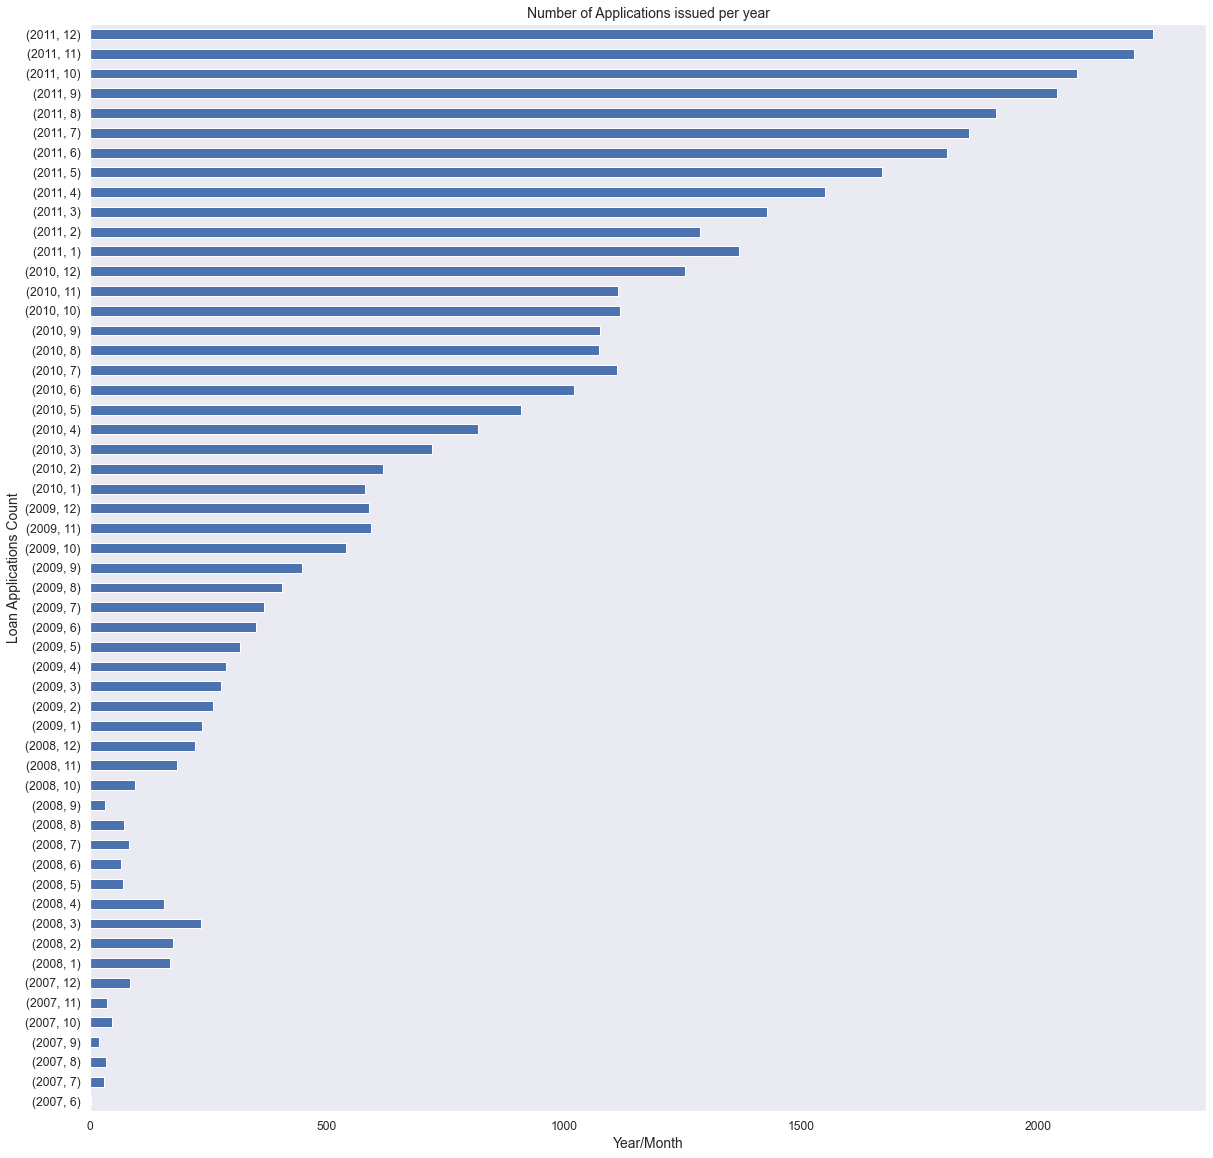

In [78]:
plt.figure(figsize = (20,20))
g = df.groupby(['year', 'month']).id.count().plot(kind = 'barh')
g.plot(kind = 'barh')
plt.title('Number of Applications issued per year', fontsize = 14)
plt.xlabel('Year/Month', fontsize = 14)
plt.ylabel('Loan Applications Count', fontsize = 14)
plt.show()

## Bivariate analysis

In [79]:
df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [80]:
df2 = df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df2['Total'] = df2['Charged Off'] + df2['Current'] + df2['Fully Paid']
df2['Charged off Proportion'] = df2['Charged Off']/df2['Total']
df2.sort_values('Charged off Proportion',ascending = False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Charged off Proportion
0,0-20000,237,9,943,1189,0.20
1,20000-40000,1514,170,7004,8688,0.17
2,40000-60000,1729,345,9534,11608,0.15
3,60000-80000,1024,240,6597,7861,0.13
4,80000 +,1080,362,8531,9973,0.11


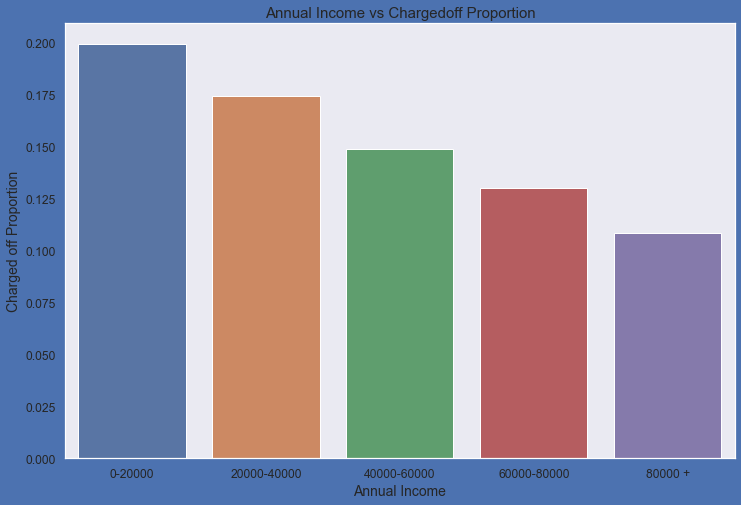

In [81]:
fig, ax1 = plt.subplots(figsize= (12, 8), facecolor = 'b')
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize = 15)
ax1 = sns.barplot(x = 'annual_inc_cats', y = 'Charged off Proportion', data = df2)
ax1.set_ylabel('Charged off Proportion', fontsize = 14)
ax1.set_xlabel('Annual Income', fontsize = 14)
plt.show()


### Lower income groups (0-20000) are more likely to default on the loan

In [82]:
df2 = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df2['Total'] = df2['Charged Off'] + df2['Current'] + df2['Fully Paid']
df2['Charged off Proportion'] = df2['Charged Off']/df2['Total']
df2.sort_values('Charged off Proportion',ascending = False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Charged off Proportion
11,small_business,472.00,74.00,1251.00,1797.00,0.26
10,renewable_energy,19.00,1.00,81.00,101.00,0.19
3,educational,55.00,0.00,268.00,323.00,0.17
9,other,629.00,126.00,3203.00,3958.00,0.16
8,moving,91.00,7.00,479.00,577.00,0.16
5,house,58.00,14.00,299.00,371.00,0.16
7,medical,106.00,12.00,568.00,686.00,0.15
2,debt_consolidation,2752.00,580.00,15165.00,18497.00,0.15
12,vacation,53.00,6.00,322.00,381.00,0.14
4,home_improvement,338.00,97.00,2459.00,2894.00,0.12


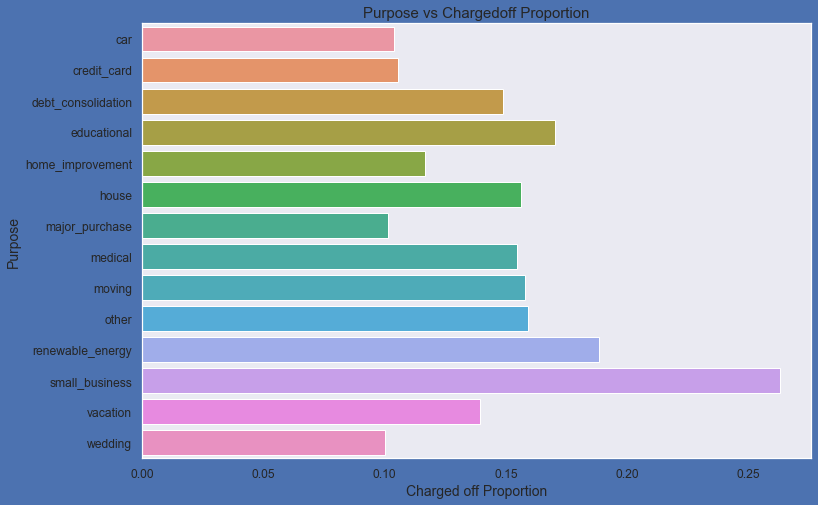

In [83]:
fig, ax1 = plt.subplots(figsize= (12, 8), facecolor = 'b')
ax1.set_title('Purpose vs Chargedoff Proportion', fontsize = 15)
ax1 = sns.barplot(y = 'purpose', x = 'Charged off Proportion', data = df2)
ax1.set_xlabel('Charged off Proportion', fontsize = 14)
ax1.set_ylabel('Purpose', fontsize = 14)
plt.show()

### Small businesses are more likely to default on their loans 

In [84]:
df2 = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df2['Total'] = df2['Charged Off'] + df2['Current'] + df2['Fully Paid']
df2['Charged off Proportion'] = df2['Charged Off']/df2['Total']
df2.sort_values('Charged off Proportion',ascending = False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Charged off Proportion
6,G,99,17,190,306,0.32
5,F,312,71,642,1025,0.30
4,E,704,176,1906,2786,0.25
3,D,1112,216,3916,5244,0.21
2,C,1342,262,6411,8015,0.17
1,B,1414,344,10167,11925,0.12
0,A,601,40,9377,10018,0.06


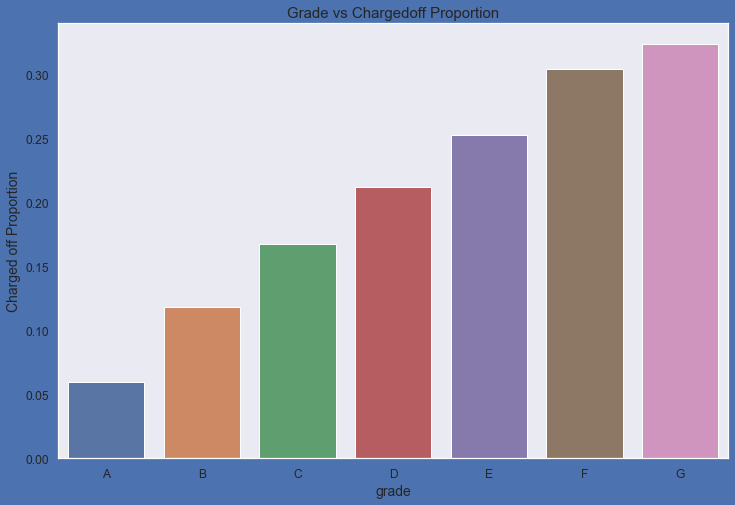

In [85]:
fig, ax1 = plt.subplots(figsize= (12, 8), facecolor = 'b')
ax1.set_title('Grade vs Chargedoff Proportion', fontsize = 15)
ax1 = sns.barplot(x = 'grade', y = 'Charged off Proportion', data = df2)
ax1.set_ylabel('Charged off Proportion', fontsize = 14)
ax1.set_xlabel('grade', fontsize = 14)
plt.show()

### Clients/Customers with rating G are most likely to default on their loans

In [87]:
df2 = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df2['Total'] = df2['Charged Off'] + df2['Current'] + df2['Fully Paid']
df2['Charged off Proportion'] = df2['Charged Off']/df2['Total']
df2.sort_values('Charged off Proportion',ascending = False)

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Charged off Proportion
29,F5,53.00,4.00,55.00,112.00,0.47
32,G3,19.00,3.00,25.00,47.00,0.40
31,G2,27.00,1.00,47.00,75.00,0.36
34,G5,10.00,1.00,18.00,29.00,0.34
28,F4,52.00,17.00,96.00,165.00,0.32
30,G1,31.00,10.00,61.00,102.00,0.30
23,E4,126.00,28.00,293.00,447.00,0.28
26,F2,69.00,16.00,162.00,247.00,0.28
27,F3,50.00,11.00,118.00,179.00,0.28
25,F1,88.00,23.00,211.00,322.00,0.27


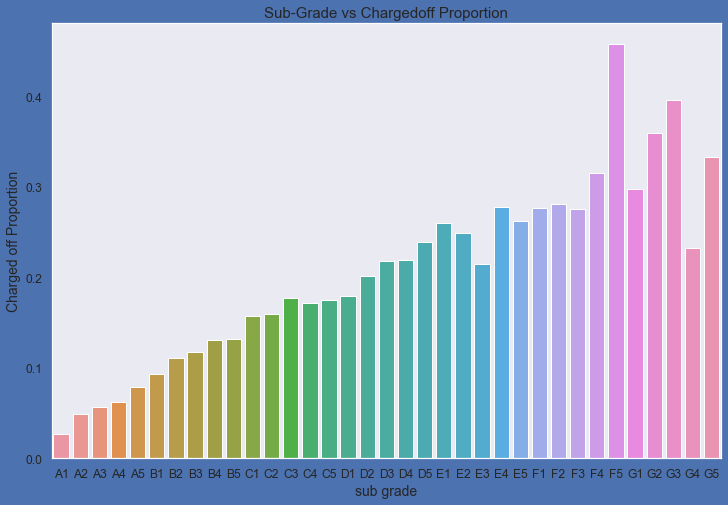

In [332]:
fig, ax1 = plt.subplots(figsize= (12, 8), facecolor = 'b')
ax1.set_title('Sub-Grade vs Chargedoff Proportion', fontsize = 15)
ax1 = sns.barplot(x = 'sub_grade', y = 'Charged off Proportion', data = df2)
ax1.set_ylabel('Charged off Proportion', fontsize = 14)
ax1.set_xlabel('sub grade', fontsize = 14)
plt.show()

### Clients with subgrade F5, G2, G4, G5 are more likely to default on their loans

In [89]:
df2['int_rate'] = df['int_rate']
#.str.rstrip('%').astype('float')
df2['int_rate_cats'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])
df2[['int_rate_cats']].head()

loan_status,int_rate_cats
0,10-13
1,12.5-16
2,12.5-16
3,12.5-16
4,12.5-16


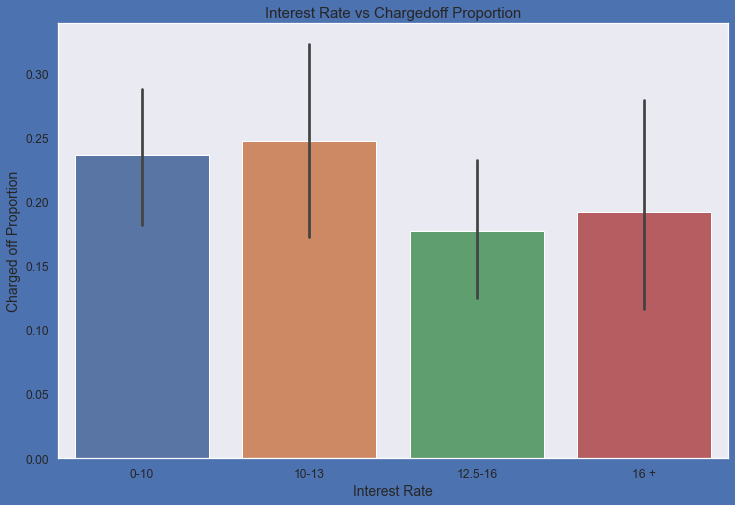

In [90]:
fig, ax1 = plt.subplots(figsize= (12, 8), facecolor = 'b')
ax1.set_title('Interest Rate vs Chargedoff Proportion', fontsize = 15)
ax1 = sns.barplot(x = 'int_rate_cats', y = 'Charged off Proportion', data = df2)
ax1.set_ylabel('Charged off Proportion', fontsize = 14)
ax1.set_xlabel('Interest Rate', fontsize = 14)
plt.show()

### Loans with interest rate 10 - 13% are more likely to default on their loans

In [91]:
df2 = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df2['Total'] = df2['Charged Off'] + df2['Current'] + df2['Fully Paid']
df2['Charged off Proportion'] = df2['Charged Off']/df2['Total']
df2.sort_values('Charged off Proportion',ascending = False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Charged off Proportion
0,0,227,42,801,1070,0.21
10,10,1316,386,7038,8740,0.15
7,7,262,62,1435,1759,0.15
1,1,1090,143,6533,7766,0.14
5,5,456,87,2712,3255,0.14
8,8,203,43,1216,1462,0.14
6,6,305,58,1846,2209,0.14
3,3,551,82,3426,4059,0.14
4,4,456,94,2860,3410,0.13
2,2,561,97,3684,4342,0.13


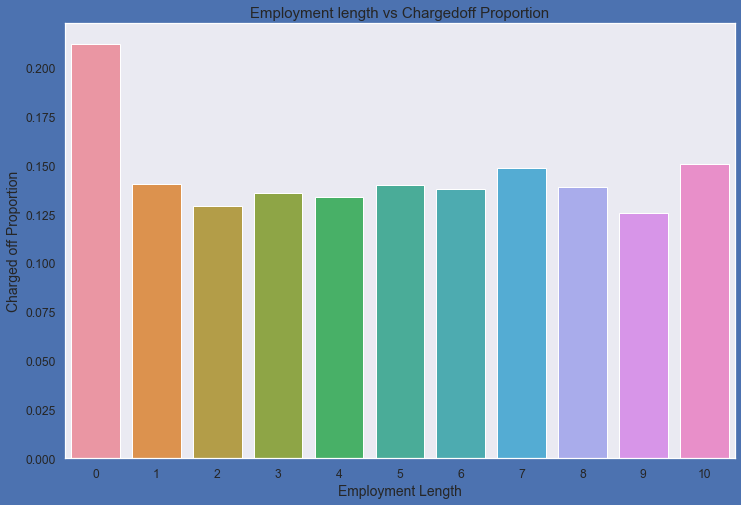

In [92]:
fig, ax1 = plt.subplots(figsize= (12, 8), facecolor = 'b')
ax1.set_title('Employment length vs Chargedoff Proportion', fontsize = 15)
ax1 = sns.barplot(x = 'emp_length', y = 'Charged off Proportion', data = df2)
ax1.set_ylabel('Charged off Proportion', fontsize = 14)
ax1.set_xlabel('Employment Length', fontsize = 14)
plt.show()

### Clients with Employment lengths less than 1 year and more than 10 years are most likely to default on their loans

In [94]:
df2 = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df2['Total'] = df2['Charged Off'] + df2['Current'] + df2['Fully Paid']
df2['Charged off Proportion'] = df2['Charged Off']/df2['Total']
df2.sort_values('Charged off Proportion',ascending = False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Charged off Proportion
28,NE,3.00,0.00,2.00,5.00,0.60
32,NV,107.00,17.00,368.00,492.00,0.22
40,SD,12.00,2.00,50.00,64.00,0.19
0,AK,14.00,2.00,63.00,79.00,0.18
9,FL,497.00,85.00,2252.00,2834.00,0.18
24,MO,114.00,16.00,551.00,681.00,0.17
13,ID,1.00,0.00,5.00,6.00,0.17
31,NM,30.00,5.00,149.00,184.00,0.16
11,HI,28.00,8.00,138.00,174.00,0.16
4,CA,1116.00,149.00,5767.00,7032.00,0.16


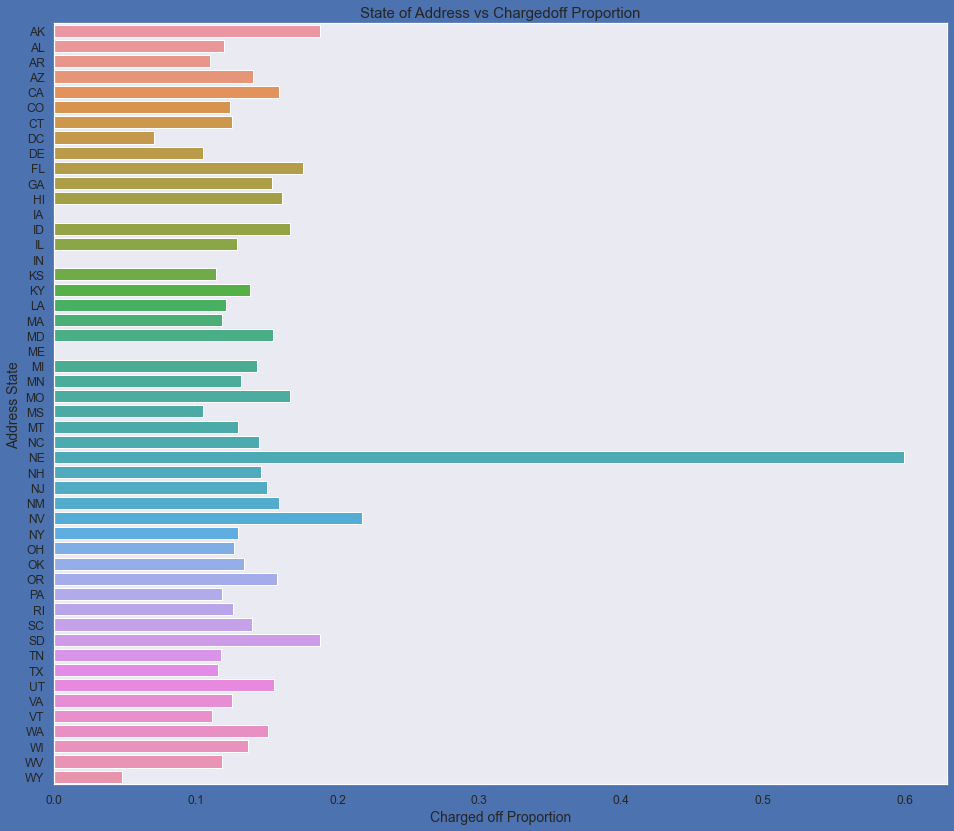

In [357]:
fig, ax1 = plt.subplots(figsize= (16, 14), facecolor = 'b')
ax1.set_title('State of Address vs Chargedoff Proportion', fontsize = 15)
ax1 = sns.barplot(y = 'addr_state', x = 'Charged off Proportion', data = df2)
ax1.set_xlabel('Charged off Proportion', fontsize = 14)
ax1.set_ylabel('Address State', fontsize = 14)
plt.show()

### The State of Nebraska (NE) has the highest ratio of defaulters

In [95]:
df2 = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df2['Total'] = df2['Charged Off'] + df2['Current'] + df2['Fully Paid']
df2['Charged off Proportion'] = df2['Charged Off']/df2['Total']
df2.sort_values('Charged off Proportion',ascending = False)

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Charged off Proportion
2,2.00,2.00,2.00,3.00,7.00,0.29
1,1.00,365.00,37.00,1268.00,1670.00,0.22
3,Not Known,116.00,0.00,572.00,688.00,0.17
0,0.00,5101.00,1087.00,30766.00,36954.00,0.14


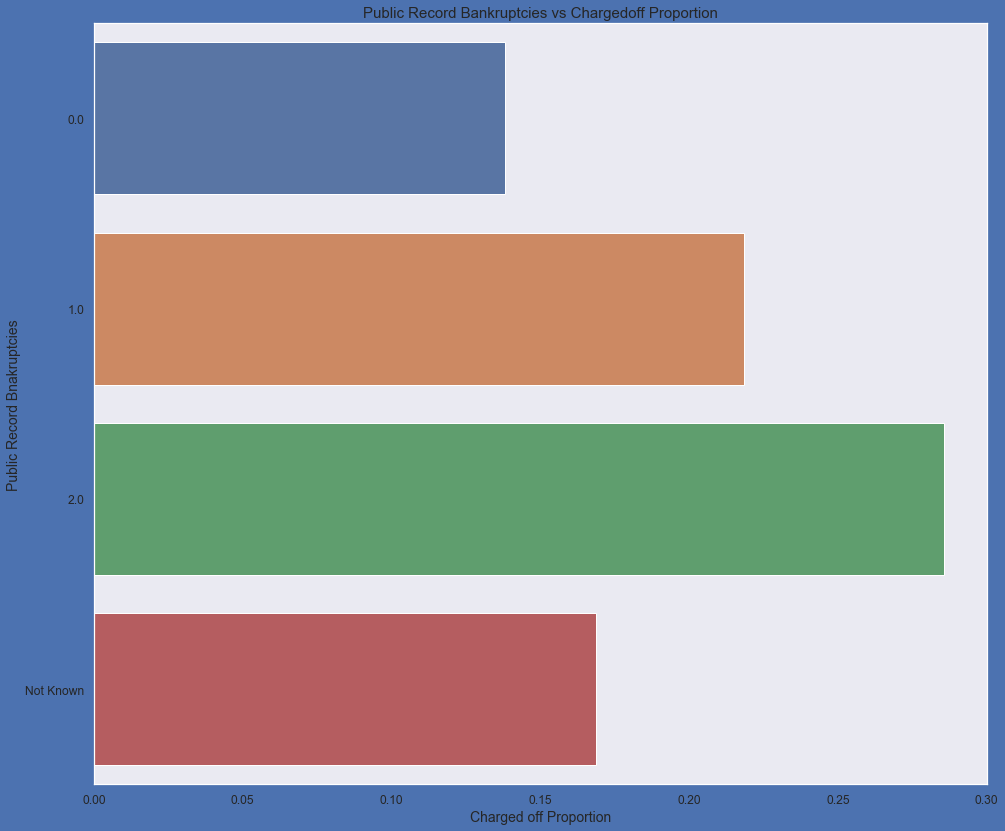

In [96]:
fig, ax1 = plt.subplots(figsize= (16, 14), facecolor = 'b')
ax1.set_title('Public Record Bankruptcies vs Chargedoff Proportion', fontsize = 15)
ax1 = sns.barplot(y = 'pub_rec_bankruptcies', x = 'Charged off Proportion', data = df2)
ax1.set_xlabel('Charged off Proportion', fontsize = 14)
ax1.set_ylabel('Public Record Bnakruptcies', fontsize = 14)
plt.show()

### Clients with two or more Public Record Bankruptcies are more likely to default on their loans 

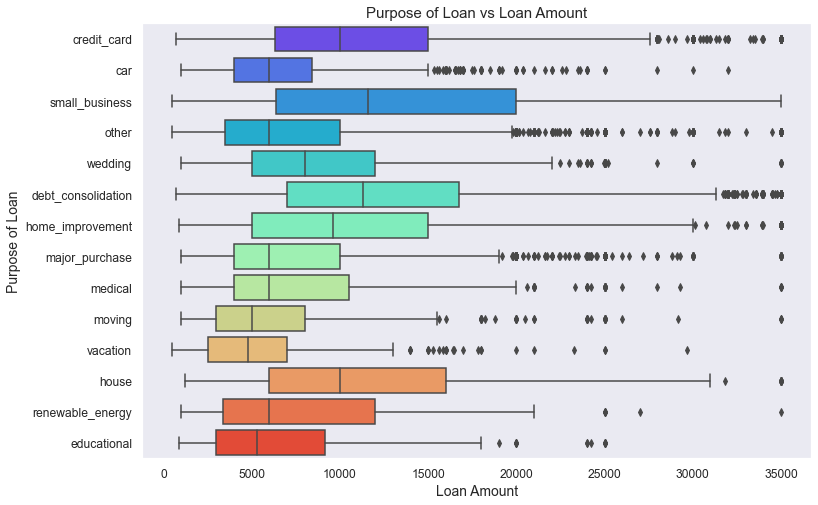

In [97]:

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15)
ax.set_ylabel('Purpose of Loan',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()

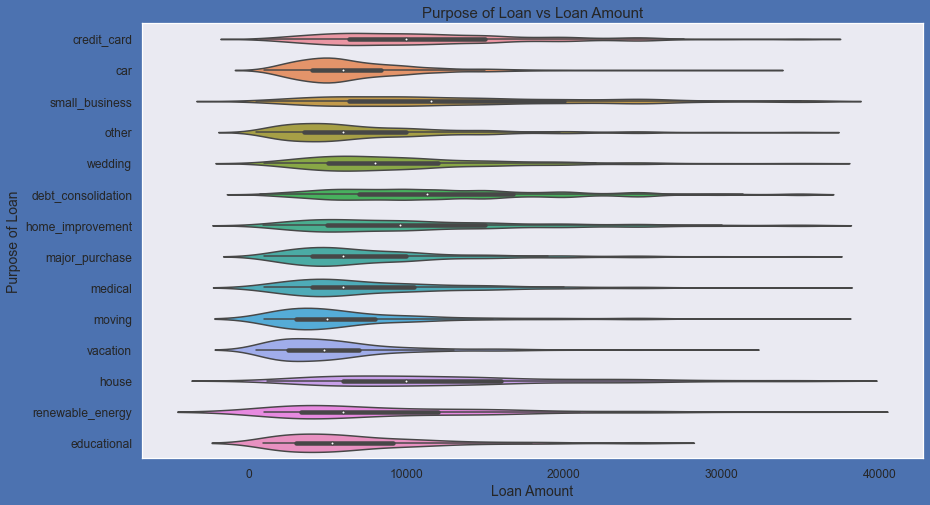

In [98]:
plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =df)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15)
ax.set_ylabel('Purpose of Loan',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()

### Loans raised for small Businesses  are most likely to default

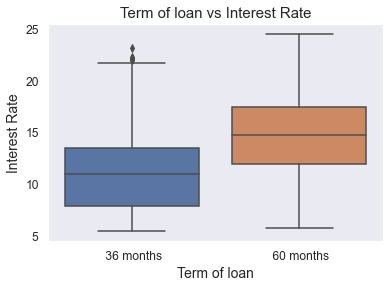

In [100]:
ax = sns.boxplot(y='int_rate', x='term', data =df)
ax.set_title('Term of loan vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Term of loan',fontsize=14)
plt.show()

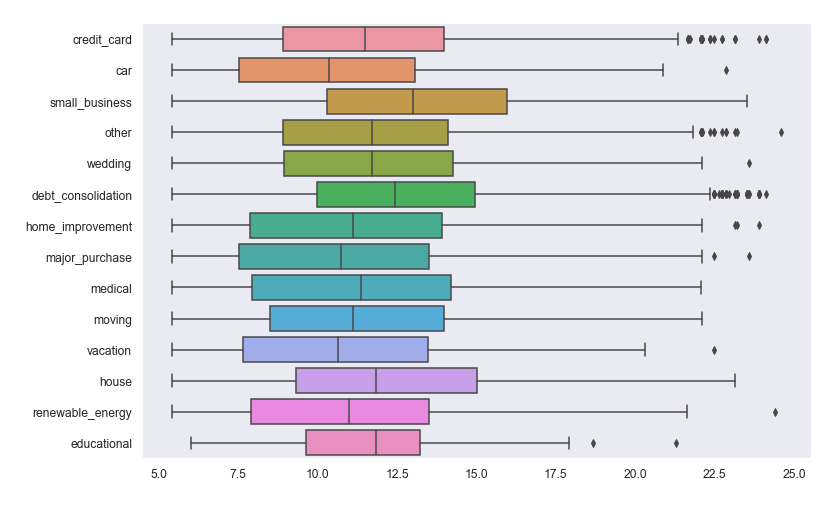

In [101]:
plt.figure(figsize = (12,8)) 
ax = sns.boxplot(x='int_rate', y='purpose', data =df)
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()


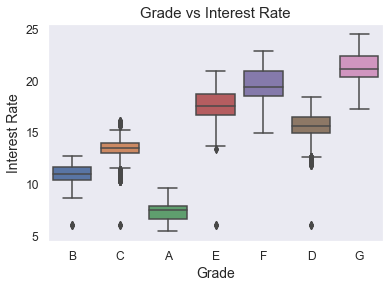

In [370]:
ax = sns.boxplot(y='int_rate', x='grade', data =df)
ax.set_title('Grade vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Grade',fontsize=14)
plt.show()

In [102]:
df['loan_amnt_cats'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

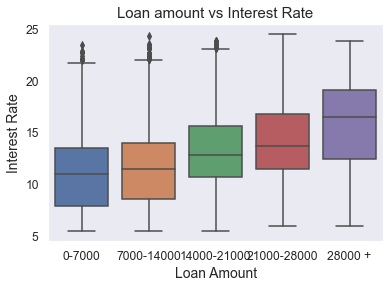

In [103]:
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =df)
ax.set_title('Loan amount vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()

In [104]:
df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


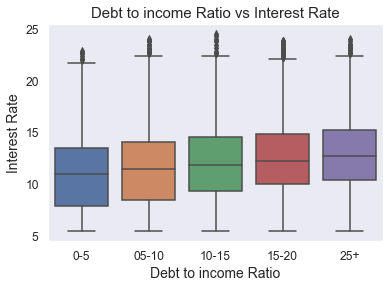

In [105]:
ax = sns.boxplot(y='int_rate', x='dti_cats', data =df)
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Debt to income Ratio',fontsize=14)
plt.show()

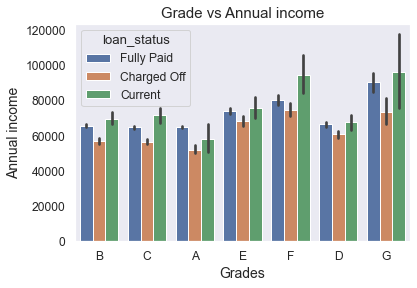

In [106]:
ax=sns.barplot(x='grade', y='annual_inc', data=df,hue="loan_status")
ax.set_title('Grade vs Annual income',fontsize=15)
ax.set_ylabel('Annual income',fontsize=14)
ax.set_xlabel('Grades',fontsize=14)
plt.show()

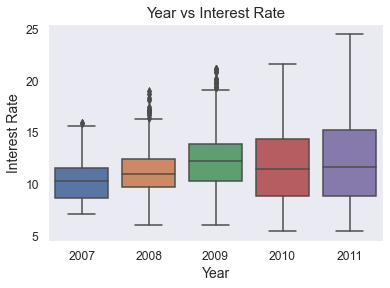

In [107]:
ax = sns.boxplot(y='int_rate', x='year', data = df)
ax.set_title('Year vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
plt.show()

### Conclusion

### 1) Small businesses are more likely to default on their loans
### 2) Lower income groups (0-20000) are more likely to default on the loan
### 3) Clients/Customers with rating G are most likely to default on their loans
### 4) Clients with subgrade F5, G2, G4, G5 are more likely to default on their loans
### 5) Loans with interest rate 10 - 13% are more likely to default on their loans
### 6) Clients with Employment lengths less than 1 year and more than 10 years are most likely to default on their loans
### 7) The State of Nebraska (NE) has the highest ratio of defaulters
### 8) Clients with two or more Public Record Bankruptcies are more likely to default on their loans